In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch

In [2]:
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [113]:
#build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [8]:
C = torch.randn((27, 2)) 

In [9]:
C[5]

tensor([1.9625, 0.9386])

In [10]:
emb = C[X]

In [11]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [12]:
h = emb.view(emb.shape[0],6) @ W1 + b1 

In [13]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([228146, 6])

In [14]:
torch.cat(torch.unbind(emb,1))

tensor([[ 1.7091, -0.4200],
        [ 1.7091, -0.4200],
        [ 1.7091, -0.4200],
        ...,
        [ 1.2628, -2.2240],
        [-0.7337, -0.3346],
        [ 0.1008, -1.0809]])

In [15]:
a = torch.arange(18)

In [16]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [17]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [18]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1 )

In [19]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [20]:
logits = h @ W2 + b2

In [21]:
logits.shape

torch.Size([228146, 27])

In [22]:
counts = logits.exp()

In [23]:
prob = counts / counts.sum(1,keepdims=True)

In [32]:
loss = -prob[torch.arange(32), Y[:32]].log().mean()
loss

tensor(14.9953)

In [114]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [150]:

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [151]:
for p in parameters:
    p.requires_grad = True

In [126]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [152]:
lri = []
lossi = []
step = []

In [163]:

for i in range(50000):

    ix = torch.randint(0,Xtr.shape[0],(32,))

    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()

    #lr = lrs[i]
    lr = 0.01

    for p in parameters:
        p.data += -lr * p.grad

    #lri.append(lre[i])
    step.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.3458807468414307
1.9543263912200928
1.9964993000030518
2.3902699947357178
2.5657119750976562
2.378626585006714
2.1138601303100586
1.9292266368865967
2.3435962200164795
2.405512571334839
2.0499441623687744
2.5141282081604004
2.2374918460845947
2.722282886505127
2.1605989933013916
1.8551816940307617
2.52705454826355
2.0424768924713135
2.0999271869659424
2.6714367866516113
2.2261905670166016
2.288217067718506
2.000922918319702
1.807389736175537
1.8676837682724
2.1867105960845947
2.4146621227264404
2.1019628047943115
2.1253159046173096
2.1931519508361816
2.278783082962036
2.122724771499634
2.117901563644409
2.2118563652038574
1.8339465856552124
2.3296210765838623
2.2159841060638428
1.9313650131225586
1.9235782623291016
2.576538562774658
2.2096328735351562
2.2879812717437744
1.8467750549316406
2.768401622772217
2.409341812133789
2.283921480178833
1.5842677354812622
2.279353141784668
2.435570478439331
1.8649463653564453
1.9793274402618408
1.9012712240219116
2.3251943588256836
2.27605962753

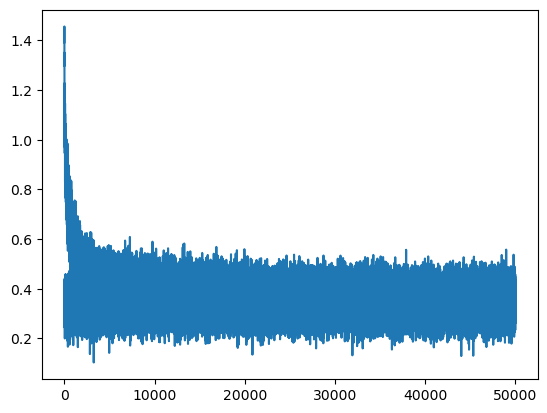

In [164]:
plt.plot(step, lossi)

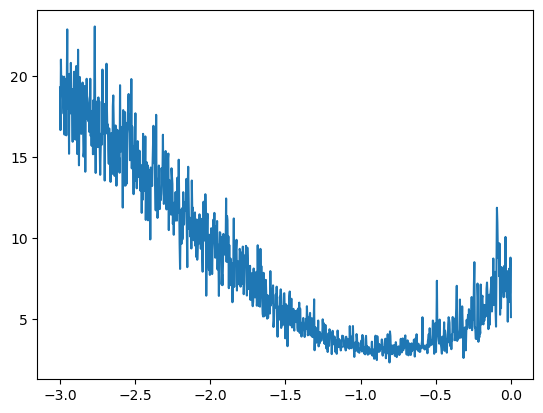

In [107]:
plt.plot(lri, lossi)

In [165]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1746, grad_fn=<NllLossBackward0>)

In [166]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2053, grad_fn=<NllLossBackward0>)

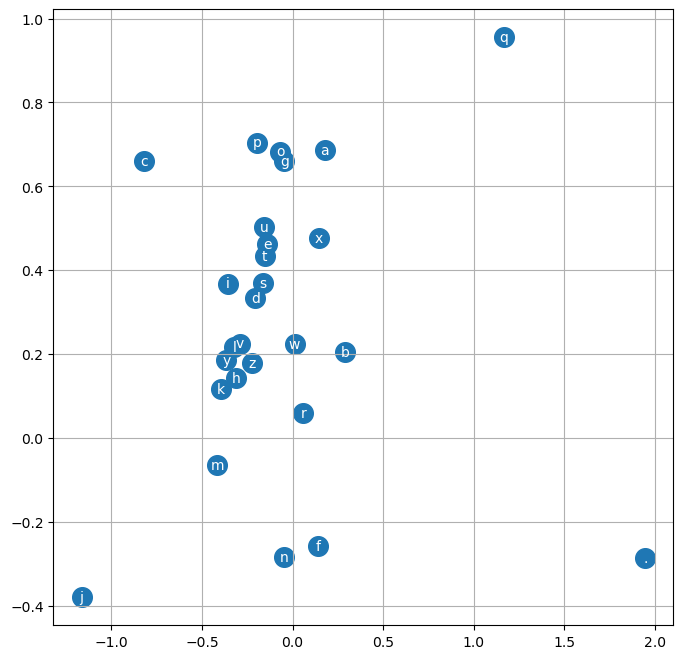

In [167]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [178]:
g = torch.Generator().manual_seed(2121113483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size 
    while True:
      emb = C[torch.tensor([context])] 
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

rylanid.
joany.
lan.
suzirey.
ren.
livelyn.
tana.
iah.
filie.
tayi.
jaylena.
aima.
kylani.
jaivurlea.
sum.
jasheelenishi.
kir.
jerna.
jonneyla.
pourabellie.
